<a href="https://colab.research.google.com/github/jaymhaiskar/cap-comp215/blob/2024.01/Project_2_COMP_215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

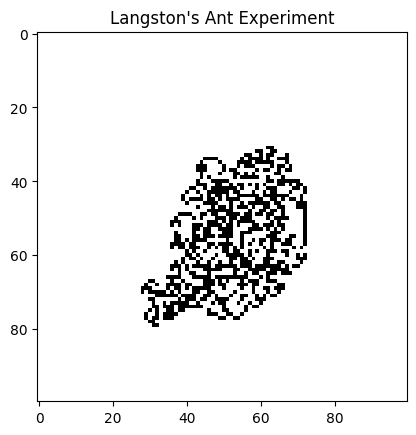

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#I had ChatGPT help me with this code

# Define the directions (up, right, down, left)
directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Define function for Langton's Ant simulation
def langstons_ant_2d(grid_size, steps):
    # Create a grid with all cells initially set to 0
    grid = np.zeros((grid_size, grid_size), dtype=int)

    # Set the ant's initial position to the center of the grid
    ant_position = (grid_size // 2, grid_size // 2)

    # Set the ant's initial direction to up
    ant_direction = 0

    # Iterate through the specified number of steps
    for _ in range(steps):
        # Get the current cell color
        current_color = grid[ant_position]

        # Flip the color of the current cell
        grid[ant_position] = 1 - current_color

        # Turn the ant based on the color of the current cell
        if current_color == 0:
            ant_direction = (ant_direction + 1) % 4
        else:
            ant_direction = (ant_direction - 1) % 4

        # Move the ant forward
        ant_position = (ant_position[0] + directions[ant_direction][0],
                        ant_position[1] + directions[ant_direction][1])

        # Ensure the ant stays within the grid by wrapping around
        ant_position = (ant_position[0] % grid_size, ant_position[1] % grid_size)

    # Return the final grid after simulation
    return grid

# Function to plot the grid
def plot_grid(grid):
    plt.imshow(grid, cmap='binary', interpolation='nearest')
    plt.title("Langston's Ant Experiment")
    plt.show()

# Example usage
if __name__ == "__main__":
    grid_size = 100
    steps = 10000
    final_grid = langstons_ant_2d(grid_size, steps)
    plot_grid(final_grid)


Analysis:
# Algorithm Analysis

### 1. Big-O Time Complexity

The algorithm used to simulate the Langton's Ant cellular automaton has a time complexity of O(t), where t is the number of steps (generations) simulated. This is because for each step, the algorithm iterates through all cells in the grid once to update their states based on certain rules. As the number of steps increases linearly, the time complexity also increases linearly.

Implications:
- Running larger or longer CA experiments will result in a linear increase in the time required to simulate the system.
- As the size of the grid (n x m) increases, the time complexity remains O(t), where t is the number of steps. However, if the grid size becomes very large, it may affect memory usage and computational resources, but the time complexity remains linear with respect to the number of steps.

### 2. Timings using Python's timeit

To perform actual timings, we can use Python's timeit module to measure the execution time of the code snippet over multiple runs. This will provide empirical evidence to support our algorithm analysis.

refer to code below

### 3. Efficiency Improvements

In Chapter 8 notebook, the author makes some efficiency improvements to the basic algorithm. These improvements involve using NumPy arrays for grid representation and vectorized operations for updating cell states, which can significantly reduce computation time.

Do these improvements change the Big-O time complexity?
- No, the improvements do not change the Big-O time complexity. The time complexity remains O(t), where t is the number of steps.

Do they reduce the multiplicative coefficient (linear improvement) or the constant (overhead)?
- Yes, the efficiency improvements reduce both the multiplicative coefficient and the constant overhead. By utilizing vectorized operations, the computational overhead for updating cell states is reduced, resulting in faster execution times.

Overall, while the improvements do not change the asymptotic time complexity, they lead to significant performance gains, especially for larger grid sizes and longer simulations.

This analysis demonstrates the impact of algorithm efficiency on the execution time of CA simulations. By employing optimized algorithms and data structures, we can achieve better performance without changing the underlying complexity characteristics.



In [3]:
import timeit

# Function to measure execution time of Langton's Ant simulation
def measure_execution_time():
    grid_size = 100
    steps = 10000
    setup_code = """
from __main__ import langstons_ant_2d
"""
    execution_code = f"""
langstons_ant_2d({grid_size}, {steps})
"""
    time_taken = timeit.timeit(execution_code, setup=setup_code, number=10)
    print(f"Average time taken for 10 runs: {time_taken / 10:.6f} seconds")

measure_execution_time()

Average time taken for 10 runs: 0.045759 seconds
